In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 7)
plt.style.use('ggplot')

In [2]:
import pandas as pd
data = {'Candy Variety':['Chocolate Hearts','Sour Jelly','Candy Canes','Sour Jelly', 'Fruit Drops'],
        'Date and Time':['9-02-2020 14:05','24-10-2020 18:00','18-12-2020 20:13','25-10-2020 10:00' ,'18-10-2020 15:46'],
        'Day' :['Sunday','Saturday' ,'Friday','Sunday' ,'Sunday'],
        'Length':[1, 3.5, 3.5, 3.5, 8],
        'Breadth':[1,2,2.5,2,6],
        'Price':[7.5, 7.6, 8, 7.6, 14]}

dfa = pd.DataFrame(data)
dfa


,Candy Variety,Date and Time,Day,Length,Breadth,Price
0,Chocolate Hearts,9-02-2020 14:05,Sunday,1.0,1.0,7.5
1,Sour Jelly,24-10-2020 18:00,Saturday,3.5,2.0,7.6
2,Candy Canes,18-12-2020 20:13,Friday,3.5,2.5,8.0
3,Sour Jelly,25-10-2020 10:00,Sunday,3.5,2.0,7.6
4,Fruit Drops,18-10-2020 15:46,Sunday,8.0,6.0,14.0


In [3]:
##converting the data and time to datatime format
dfa['Date and Time'] = pd.to_datetime(dfa['Date and Time'], format="%d-%m-%Y %H:%M")
dfa

,Candy Variety,Date and Time,Day,Length,Breadth,Price
0,Chocolate Hearts,2020-02-09 14:05:00,Sunday,1.0,1.0,7.5
1,Sour Jelly,2020-10-24 18:00:00,Saturday,3.5,2.0,7.6
2,Candy Canes,2020-12-18 20:13:00,Friday,3.5,2.5,8.0
3,Sour Jelly,2020-10-25 10:00:00,Sunday,3.5,2.0,7.6
4,Fruit Drops,2020-10-18 15:46:00,Sunday,8.0,6.0,14.0


In [4]:
##Creating new feature data from the existing feature data
##Creating Date and Time from the Date and Time attribute
dfa['Date'] = dfa['Date and Time'].dt.date
dfa['Time'] = dfa['Date and Time'].dt.time
dfa

,Candy Variety,Date and Time,Day,Length,Breadth,Price,Date,Time
0,Chocolate Hearts,2020-02-09 14:05:00,Sunday,1.0,1.0,7.5,2020-02-09,14:05:00
1,Sour Jelly,2020-10-24 18:00:00,Saturday,3.5,2.0,7.6,2020-10-24,18:00:00
2,Candy Canes,2020-12-18 20:13:00,Friday,3.5,2.5,8.0,2020-12-18,20:13:00
3,Sour Jelly,2020-10-25 10:00:00,Sunday,3.5,2.0,7.6,2020-10-25,10:00:00
4,Fruit Drops,2020-10-18 15:46:00,Sunday,8.0,6.0,14.0,2020-10-18,15:46:00


In [5]:
# If you wanted to know more about the weekend and weekday sale trends, in particular, you could 
# categorize the days of the week in a feature called Weekend with 1=True and 0=False

In [6]:
dfa['weekend'] = np.where(dfa['Day'].isin(['Saturday', 'Sunday']), 1, 0)
dfa

,Candy Variety,Date and Time,Day,Length,Breadth,Price,Date,Time,weekend
0,Chocolate Hearts,2020-02-09 14:05:00,Sunday,1.0,1.0,7.5,2020-02-09,14:05:00,1
1,Sour Jelly,2020-10-24 18:00:00,Saturday,3.5,2.0,7.6,2020-10-24,18:00:00,1
2,Candy Canes,2020-12-18 20:13:00,Friday,3.5,2.5,8.0,2020-12-18,20:13:00,0
3,Sour Jelly,2020-10-25 10:00:00,Sunday,3.5,2.0,7.6,2020-10-25,10:00:00,1
4,Fruit Drops,2020-10-18 15:46:00,Sunday,8.0,6.0,14.0,2020-10-18,15:46:00,1


    1)Imputation:
    ---Dealing with the missing values
    -----Either delete the record OR fill with mean

    Categories:
    1)Categorical Imputation: Missing categorical values replaced with most commonly occuring values
    2)Numerical Imputation: Missing numerical values are replaced with mean of corresponding values

In [7]:
dfb = pd.DataFrame(data)
dfb['Date and Time'] = pd.to_datetime(dfb['Date and Time'], format="%d-%m-%Y %H:%M")

##Appending the new row with missing values
dfb.loc[len(dfb.index)] = [np.NaN, "22-10-2020 17:24:00","Thursday", 3.5, 2, np.NaN]
dfb

,Candy Variety,Date and Time,Day,Length,Breadth,Price
0,Chocolate Hearts,2020-02-09 14:05:00,Sunday,1.0,1.0,7.5
1,Sour Jelly,2020-10-24 18:00:00,Saturday,3.5,2.0,7.6
2,Candy Canes,2020-12-18 20:13:00,Friday,3.5,2.5,8.0
3,Sour Jelly,2020-10-25 10:00:00,Sunday,3.5,2.0,7.6
4,Fruit Drops,2020-10-18 15:46:00,Sunday,8.0,6.0,14.0
5,NaN,22-10-2020 17:24:00,Thursday,3.5,2.0,NaN


In [8]:
##Filling the categorical with most occuring value
dfb['Candy Variety'] = dfb['Candy Variety'].fillna(dfb['Candy Variety'].mode()[0])
#In dfb['Candy Variety'].mode() calculate mode with most frequent observation
#In .mode()[0] select the first value from mode result, bcz mode returns series of objects

##Filling the numerical value with the mean
dfb['Price'] = dfb['Price'].fillna(dfb['Price'].mean())

dfb

,Candy Variety,Date and Time,Day,Length,Breadth,Price
0,Chocolate Hearts,2020-02-09 14:05:00,Sunday,1.0,1.0,7.50
1,Sour Jelly,2020-10-24 18:00:00,Saturday,3.5,2.0,7.60
2,Candy Canes,2020-12-18 20:13:00,Friday,3.5,2.5,8.00
3,Sour Jelly,2020-10-25 10:00:00,Sunday,3.5,2.0,7.60
4,Fruit Drops,2020-10-18 15:46:00,Sunday,8.0,6.0,14.00
5,Sour Jelly,22-10-2020 17:24:00,Thursday,3.5,2.0,8.94


    2) Descretization
        It involves essentially taking a set of values of data and grouping sets of them 
        together in some logical fashion into bins (or buckets).
        Binning can be applied to numerical value and categorical value
       The grouping data is as follows:
        1. Group based on equal intervals
        2. Grouping based on equal frequencies
        3. Grouping based on decision tree sorting(to establish relation with target)

In [9]:
dfb['Type of Day'] = np.where(dfb['Day'].isin(['Saturday', 'Sunday']), 'Weekend', 'Weekday')
dfb

,Candy Variety,Date and Time,Day,Length,Breadth,Price,Type of Day
0,Chocolate Hearts,2020-02-09 14:05:00,Sunday,1.0,1.0,7.50,Weekend
1,Sour Jelly,2020-10-24 18:00:00,Saturday,3.5,2.0,7.60,Weekend
2,Candy Canes,2020-12-18 20:13:00,Friday,3.5,2.5,8.00,Weekday
3,Sour Jelly,2020-10-25 10:00:00,Sunday,3.5,2.0,7.60,Weekend
4,Fruit Drops,2020-10-18 15:46:00,Sunday,8.0,6.0,14.00,Weekend
5,Sour Jelly,22-10-2020 17:24:00,Thursday,3.5,2.0,8.94,Weekday


    3) Categorical Encoding
        It is the technique used to encode categorical features into numerical values
        which are simpler for algorithm to understand

    -One Hot Encoding(OHE): Popular technique for categorical encoding

    -Disadvantages:
        *Dramatic inrease in number of features
        *Result in the creation of highly correlated features

In [10]:
for k in dfb['Type of Day'].unique():
    dfb[k] = np.where(dfb['Type of Day']==k, 1, 0)
dfb

,Candy Variety,Date and Time,Day,Length,Breadth,Price,Type of Day,Weekend,Weekday
0,Chocolate Hearts,2020-02-09 14:05:00,Sunday,1.0,1.0,7.50,Weekend,1,0
1,Sour Jelly,2020-10-24 18:00:00,Saturday,3.5,2.0,7.60,Weekend,1,0
2,Candy Canes,2020-12-18 20:13:00,Friday,3.5,2.5,8.00,Weekday,0,1
3,Sour Jelly,2020-10-25 10:00:00,Sunday,3.5,2.0,7.60,Weekend,1,0
4,Fruit Drops,2020-10-18 15:46:00,Sunday,8.0,6.0,14.00,Weekend,1,0
5,Sour Jelly,22-10-2020 17:24:00,Thursday,3.5,2.0,8.94,Weekday,0,1


    4) Feature Splitting
        Splitting features into parts can sometimes increase the value of features towards
        target.

In [11]:
dfb['Date and Time'] = pd.to_datetime(dfb['Date and Time'])
dfb['Date'] = dfb['Date and Time'].dt.date
dfb['Time'] = dfb['Date and Time'].dt.time
dfb

,Candy Variety,Date and Time,Day,Length,Breadth,Price,Type of Day,Weekend,Weekday,Date,Time
0,Chocolate Hearts,2020-02-09 14:05:00,Sunday,1.0,1.0,7.50,Weekend,1,0,2020-02-09,14:05:00
1,Sour Jelly,2020-10-24 18:00:00,Saturday,3.5,2.0,7.60,Weekend,1,0,2020-10-24,18:00:00
2,Candy Canes,2020-12-18 20:13:00,Friday,3.5,2.5,8.00,Weekday,0,1,2020-12-18,20:13:00
3,Sour Jelly,2020-10-25 10:00:00,Sunday,3.5,2.0,7.60,Weekend,1,0,2020-10-25,10:00:00
4,Fruit Drops,2020-10-18 15:46:00,Sunday,8.0,6.0,14.00,Weekend,1,0,2020-10-18,15:46:00
5,Sour Jelly,2020-10-22 17:24:00,Thursday,3.5,2.0,8.94,Weekday,0,1,2020-10-22,17:24:00


    5) Handling Outliers
        -Outliers are the data points that significantly deviate from the data. The can be the
        observations that are usually high or low compared to other values.
        -They can adversely affect our prediction, so they should be handled properly.
        1) Removal
        2) Replacing values
        3) Capping: replace the min and max vals with arbitrary values
        4) Descritization


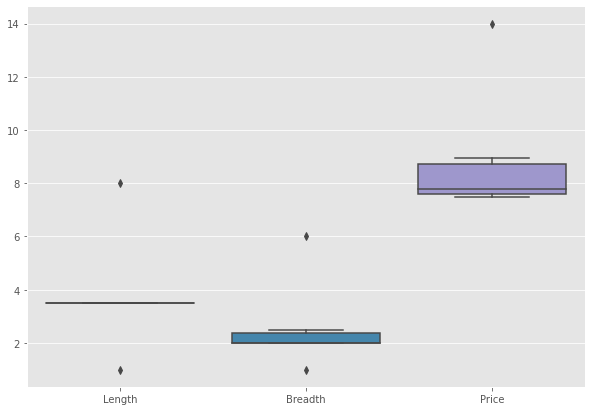

In [12]:
sb.boxplot(data=dfb[['Length', 'Breadth', 'Price']])
plt.show()

In [13]:
##Handling the outliers for the Length
Q1 = dfb['Length'].quantile(0.25)
Q3 = dfb['Length'].quantile(0.75)

IQR = Q3-Q1

lower_extreme = Q1-1.5*IQR
upper_extreme = Q3+1.5*IQR

In [14]:
outliers = dfb[(dfb['Length'] < lower_extreme) | (dfb['Length'] > upper_extreme)]
outliers

,Candy Variety,Date and Time,Day,Length,Breadth,Price,Type of Day,Weekend,Weekday,Date,Time
0,Chocolate Hearts,2020-02-09 14:05:00,Sunday,1.0,1.0,7.5,Weekend,1,0,2020-02-09,14:05:00
4,Fruit Drops,2020-10-18 15:46:00,Sunday,8.0,6.0,14.0,Weekend,1,0,2020-10-18,15:46:00


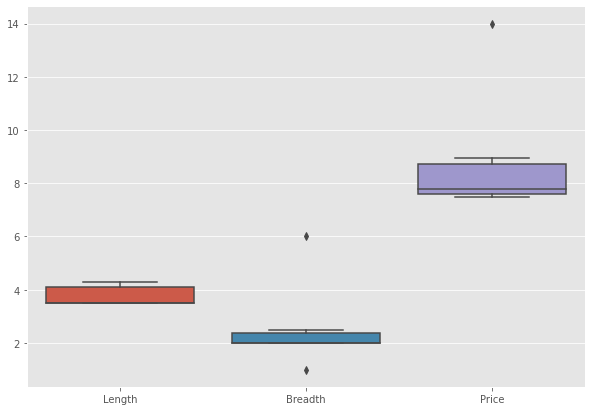

In [15]:
dfb.loc[dfb['Length'] < lower_extreme, 'Length'] = dfb['Length'].mean()
dfb.loc[dfb['Length'] > upper_extreme, 'Length'] = dfb['Length'].mean()
sb.boxplot(data=dfb[['Length', 'Breadth', 'Price']])
plt.show()

In [16]:
##Handling the outliers for the Breadth
q1 = dfb['Breadth'].quantile(0.25)
q3 = dfb['Breadth'].quantile(0.75)

IQR = q3-q1

lower_extreme = q1-1.5*IQR
upper_extreme = q3+1.5*IQR

In [17]:
##Defining the outliers
outliers = dfb[(dfb['Breadth'] < lower_extreme) | (dfb['Breadth'] > upper_extreme)]
outliers

,Candy Variety,Date and Time,Day,Length,Breadth,Price,Type of Day,Weekend,Weekday,Date,Time
0,Chocolate Hearts,2020-02-09 14:05:00,Sunday,4.305556,1.0,7.5,Weekend,1,0,2020-02-09,14:05:00
4,Fruit Drops,2020-10-18 15:46:00,Sunday,4.305556,6.0,14.0,Weekend,1,0,2020-10-18,15:46:00


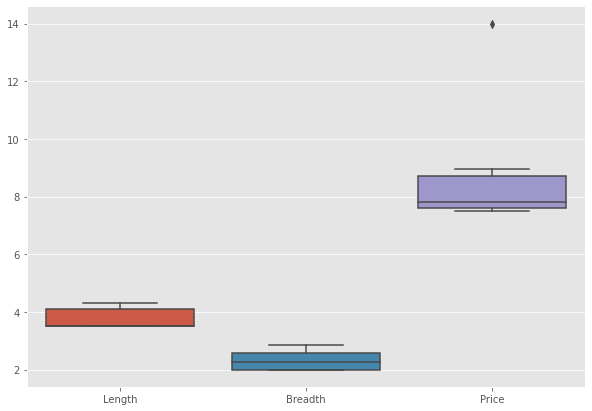

In [18]:
##Replacing the outlier with mean()
dfb.loc[dfb['Breadth'] < lower_extreme, 'Breadth'] = dfb['Breadth'].mean()
dfb.loc[dfb['Breadth'] > upper_extreme, 'Breadth'] = dfb['Breadth'].mean()
sb.boxplot(data=dfb[['Length', 'Breadth', 'Price']])
plt.show()

In [19]:
##Handling the outlier of the Price
q1 = dfb['Price'].quantile(0.25)
q3 = dfb['Price'].quantile(0.75)

IQR = q3-q1

lower_extreme = q1-1.5*IQR
upper_extreme = q3+1.5*IQR

In [20]:
##Defining the outliers
outliers = dfb[(dfb['Price'] < lower_extreme) | (dfb['Price'] > upper_extreme)]
outliers

,Candy Variety,Date and Time,Day,Length,Breadth,Price,Type of Day,Weekend,Weekday,Date,Time
4,Fruit Drops,2020-10-18 15:46:00,Sunday,4.305556,2.847222,14.0,Weekend,1,0,2020-10-18,15:46:00


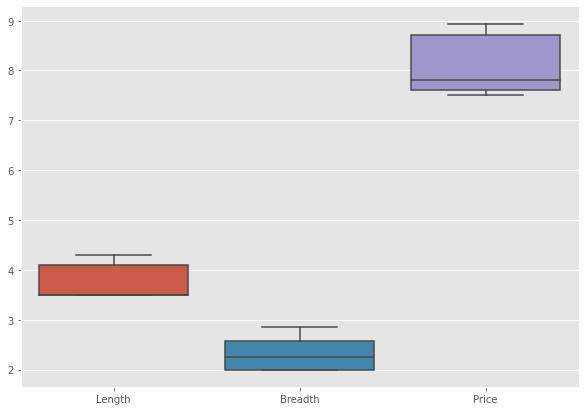

In [21]:
##Replacing the outlier with mean()
dfb.loc[dfb['Price'] < lower_extreme, 'Price'] = dfb['Price'].mean()
dfb.loc[dfb['Price'] > upper_extreme, 'Price'] = dfb['Price'].mean()
sb.boxplot(data=dfb[['Length', 'Breadth', 'Price']])
plt.show()

    6) Variable Transformation

In [22]:
dfb['Area'] = dfb['Length'] * dfb['Breadth']
dfb

,Candy Variety,Date and Time,Day,Length,Breadth,Price,Type of Day,Weekend,Weekday,Date,Time,Area
0,Chocolate Hearts,2020-02-09 14:05:00,Sunday,4.305556,2.583333,7.50,Weekend,1,0,2020-02-09,14:05:00,11.122685
1,Sour Jelly,2020-10-24 18:00:00,Saturday,3.500000,2.000000,7.60,Weekend,1,0,2020-10-24,18:00:00,7.000000
2,Candy Canes,2020-12-18 20:13:00,Friday,3.500000,2.500000,8.00,Weekday,0,1,2020-12-18,20:13:00,8.750000
3,Sour Jelly,2020-10-25 10:00:00,Sunday,3.500000,2.000000,7.60,Weekend,1,0,2020-10-25,10:00:00,7.000000
4,Fruit Drops,2020-10-18 15:46:00,Sunday,4.305556,2.847222,8.94,Weekend,1,0,2020-10-18,15:46:00,12.258873
5,Sour Jelly,2020-10-22 17:24:00,Thursday,3.500000,2.000000,8.94,Weekday,0,1,2020-10-22,17:24:00,7.000000


In [23]:
dfb['Is Sour Jelly'] = dfb['Candy Variety'].apply(lambda x:1 if x=="Sour Jelly" else 0)
dfb

,Candy Variety,Date and Time,Day,Length,Breadth,Price,Type of Day,Weekend,Weekday,Date,Time,Area,Is Sour Jelly
0,Chocolate Hearts,2020-02-09 14:05:00,Sunday,4.305556,2.583333,7.50,Weekend,1,0,2020-02-09,14:05:00,11.122685,0
1,Sour Jelly,2020-10-24 18:00:00,Saturday,3.500000,2.000000,7.60,Weekend,1,0,2020-10-24,18:00:00,7.000000,1
2,Candy Canes,2020-12-18 20:13:00,Friday,3.500000,2.500000,8.00,Weekday,0,1,2020-12-18,20:13:00,8.750000,0
3,Sour Jelly,2020-10-25 10:00:00,Sunday,3.500000,2.000000,7.60,Weekend,1,0,2020-10-25,10:00:00,7.000000,1
4,Fruit Drops,2020-10-18 15:46:00,Sunday,4.305556,2.847222,8.94,Weekend,1,0,2020-10-18,15:46:00,12.258873,0
5,Sour Jelly,2020-10-22 17:24:00,Thursday,3.500000,2.000000,8.94,Weekday,0,1,2020-10-22,17:24:00,7.000000,1


    7) Scalling
        Transforming the values in a dataset to a specific range or distribution
     -) Scalling is needed when variables have different units, it can affect the performance
        of certain algorithms and statistical analysis.
     -) It is a common step to ensure that variables are comparible and don't ensure the bias
        ans distortion in the analysis.
    TYPES:
        1) Min-max scalling:
            This process involves the rescaling of all values in a feature in the range 0 to 1.
            In other words, the minimum value in the original range will take the value 0, 
            the maximum value will take 1 and the rest of the values in between the two 
            extremes will be appropriately scaled.
        2) Standardization/variance Scalling/Z-score normalization:
            All the datapoints are subtracted by their means and the result is divided by
            distribution's variance or standard deviation, to arrive at a distribution with
            a 0 mean and 1 variance.

In [24]:
## Min-Max Scalling
from sklearn.preprocessing import MinMaxScaler
dfmm = dfb.copy()
scaler = MinMaxScaler()
numerical_columns = ["Length", "Breadth", "Price", "Area"]
dfmm[numerical_columns] = scaler.fit_transform(dfmm[numerical_columns])
dfmm

,Candy Variety,Date and Time,Day,Length,Breadth,Price,Type of Day,Weekend,Weekday,Date,Time,Area,Is Sour Jelly
0,Chocolate Hearts,2020-02-09 14:05:00,Sunday,1.0,0.688525,0.000000,Weekend,1,0,2020-02-09,14:05:00,0.783948,0
1,Sour Jelly,2020-10-24 18:00:00,Saturday,0.0,0.000000,0.069444,Weekend,1,0,2020-10-24,18:00:00,0.000000,1
2,Candy Canes,2020-12-18 20:13:00,Friday,0.0,0.590164,0.347222,Weekday,0,1,2020-12-18,20:13:00,0.332771,0
3,Sour Jelly,2020-10-25 10:00:00,Sunday,0.0,0.000000,0.069444,Weekend,1,0,2020-10-25,10:00:00,0.000000,1
4,Fruit Drops,2020-10-18 15:46:00,Sunday,1.0,1.000000,1.000000,Weekend,1,0,2020-10-18,15:46:00,1.000000,0
5,Sour Jelly,2020-10-22 17:24:00,Thursday,0.0,0.000000,1.000000,Weekday,0,1,2020-10-22,17:24:00,0.000000,1


In [25]:
## Standard(Z-Score Scalling)
from sklearn.preprocessing import StandardScaler
dfsz = dfb.copy()
numerical_columns = ["Length", "Breadth", "Price", "Area"]

##Initializing the scalar object
##The StandardScaler scales the data by subtracting the mean and dividing by std.
scaler = StandardScaler()

##Apply scalling to the numerical columns
dfsz[numerical_columns] = scaler.fit_transform(dfsz[numerical_columns])
dfsz

,Candy Variety,Date and Time,Day,Length,Breadth,Price,Type of Day,Weekend,Weekday,Date,Time,Area,Is Sour Jelly
0,Chocolate Hearts,2020-02-09 14:05:00,Sunday,1.414214,0.773085,-0.967681,Weekend,1,0,2020-02-09,14:05:00,1.067633,0
1,Sour Jelly,2020-10-24 18:00:00,Saturday,-0.707107,-0.950962,-0.805500,Weekend,1,0,2020-10-24,18:00:00,-0.873562,1
2,Candy Canes,2020-12-18 20:13:00,Friday,-0.707107,0.526792,-0.156775,Weekday,0,1,2020-12-18,20:13:00,-0.049562,0
3,Sour Jelly,2020-10-25 10:00:00,Sunday,-0.707107,-0.950962,-0.805500,Weekend,1,0,2020-10-25,10:00:00,-0.873562,1
4,Fruit Drops,2020-10-18 15:46:00,Sunday,1.414214,1.553011,1.367727,Weekend,1,0,2020-10-18,15:46:00,1.602615,0
5,Sour Jelly,2020-10-22 17:24:00,Thursday,-0.707107,-0.950962,1.367727,Weekday,0,1,2020-10-22,17:24:00,-0.873562,1


    8) Creating Features

In [26]:
dfb['Is Expensive'] = np.where(dfb['Price'] > dfb['Price'].mean(), 1, 0)
dfb['Price Per Unit Area'] = dfb['Price']/dfb['Area']
dfb

,Candy Variety,Date and Time,Day,Length,Breadth,Price,Type of Day,Weekend,Weekday,Date,Time,Area,Is Sour Jelly,Is Expensive,Price Per Unit Area
0,Chocolate Hearts,2020-02-09 14:05:00,Sunday,4.305556,2.583333,7.50,Weekend,1,0,2020-02-09,14:05:00,11.122685,0,0,0.674298
1,Sour Jelly,2020-10-24 18:00:00,Saturday,3.500000,2.000000,7.60,Weekend,1,0,2020-10-24,18:00:00,7.000000,1,0,1.085714
2,Candy Canes,2020-12-18 20:13:00,Friday,3.500000,2.500000,8.00,Weekday,0,1,2020-12-18,20:13:00,8.750000,0,0,0.914286
3,Sour Jelly,2020-10-25 10:00:00,Sunday,3.500000,2.000000,7.60,Weekend,1,0,2020-10-25,10:00:00,7.000000,1,0,1.085714
4,Fruit Drops,2020-10-18 15:46:00,Sunday,4.305556,2.847222,8.94,Weekend,1,0,2020-10-18,15:46:00,12.258873,0,1,0.729268
5,Sour Jelly,2020-10-22 17:24:00,Thursday,3.500000,2.000000,8.94,Weekday,0,1,2020-10-22,17:24:00,7.000000,1,1,1.277143


In [27]:
# Apply one-hot encoding to 'Candy Variety'
encoded_df = pd.get_dummies(dfa['Candy Variety'])

# Concatenate the encoded DataFrame with the original DataFrame
dfa_encoded = pd.concat([dfa, encoded_df], axis=1)

# Drop the original 'Candy Variety' column
dfa_encoded.drop('Candy Variety', axis=1, inplace=True)

# Print the encoded DataFrame
dfa_encoded


,Date and Time,Day,Length,Breadth,Price,Date,Time,weekend,Candy Canes,Chocolate Hearts,Fruit Drops,Sour Jelly
0,2020-02-09 14:05:00,Sunday,1.0,1.0,7.5,2020-02-09,14:05:00,1,False,True,False,False
1,2020-10-24 18:00:00,Saturday,3.5,2.0,7.6,2020-10-24,18:00:00,1,False,False,False,True
2,2020-12-18 20:13:00,Friday,3.5,2.5,8.0,2020-12-18,20:13:00,0,True,False,False,False
3,2020-10-25 10:00:00,Sunday,3.5,2.0,7.6,2020-10-25,10:00:00,1,False,False,False,True
4,2020-10-18 15:46:00,Sunday,8.0,6.0,14.0,2020-10-18,15:46:00,1,False,False,True,False
